In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as soup

In [2]:
# 데이터 크롤링 함수 
def get_data(URL):
    r = requests.get(URL)  # 'URL' 대신 URL 변수를 사용합니다.
    s = BeautifulSoup(r.content, 'html.parser')  # 파서를 명시해줍니다.
    table = s.find('table')
    tbody = table.find('tbody')
    trs = tbody.find_all('tr')
    
    columns =[
    "Rank", "Name", "Team", "Sort_OBP","G", "PA", "AB", "R", "H",
    "2B", "3B", "HR", "TB", "RBI", "SB", "CS", "GO", "FO", "BB", "HP", "IB",
    "SO", "GDP", "SH", "SF", "AVG", "OBP", "SLG", "OPS"]

    # 빈 데이터프레임 생성
    df = pd.DataFrame(columns=columns)
    for i in range(len(trs)):
        td_texts = [td.text for td in trs[i].find_all('td')]
        # 현재 행의 길이를 최대 길이에 맞춤
        td_texts += [None] * (len(columns) - len(td_texts))
        df.loc[len(df)] = td_texts
    df.dropna(inplace=True)
    
    columns_to_convert = ["Sort_OBP","G", "PA", "AB", "R", "H",
    "2B", "3B", "HR", "TB", "RBI", "SB", "CS", "GO", "FO", "BB", "HP", "IB",
    "SO", "GDP", "SH", "SF", "AVG", "OBP", "SLG", "OPS"]

    df[columns_to_convert] = df[columns_to_convert].astype(float)
    
    df['BBSO'] = df['BB'] /df['SO']

    return df

In [3]:
# EDA 함수 
def plot_compare(df11, df12, year, column_name):
    plt.figure(figsize=(20, 12))  # 그래프 크기 조정
    
    # 2013년 데이터 히스토그램
    plt.subplot(2, 2, 1)  # 2행 2열 중 첫 번째 그래프
    plt.hist(df11[column_name], bins=20, color='green', alpha=0.7, label=str(year))
    mean_df11 = np.mean(df11[column_name])
    plt.axvline(mean_df11, color='red', linestyle='--', linewidth=2, label='Mean')  # 평균값에 해당하는 빨간 선 추가
    plt.title(f'{year} - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    
    # 2014년 데이터 히스토그램
    plt.subplot(2, 2, 2)  # 2행 2열 중 두 번째 그래프
    plt.hist(df12[column_name], bins=20, color='green', alpha=0.7, label=str(year+1))
    mean_df12 = np.mean(df12[column_name])
    plt.axvline(mean_df12, color='red', linestyle='--', linewidth=2, label='Mean')  # 평균값에 해당하는 빨간 선 추가
    plt.title(f'{year+1} - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    
    # 2023년 데이터 히스토그램
    plt.subplot(2, 2, 3)  # 2행 2열 중 세 번째 그래프
    plt.hist(hitter_2023[column_name], bins=20, color='darkorange', alpha=0.7, label='2023')
    mean_hitter_2023 = np.mean(hitter_2023[column_name])
    plt.axvline(mean_hitter_2023, color='red', linestyle='--', linewidth=2, label='Mean')  # 평균값에 해당하는 빨간 선 추가
    plt.title(f'2023 - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    
    # 2024년 데이터 히스토그램
    plt.subplot(2, 2, 4)  # 2행 2열 중 네 번째 그래프
    plt.hist(hitter_2024[column_name], bins=20, color='darkorange', alpha=0.7, label='2024')
    mean_hitter_2024 = np.mean(hitter_2024[column_name])
    plt.axvline(mean_hitter_2024, color='red', linestyle='--', linewidth=2, label='Mean')  # 평균값에 해당하는 빨간 선 추가
    plt.title(f'2024 - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()  # 각 그래프간의 간격 조정
    plt.show()
    
    diff_1 = mean_df12 - mean_df11
    diff_2 = mean_hitter_2024 - mean_hitter_2023
    print(str(year), column_name, '평균:', mean_df11)
    print(str(year+1), column_name, '평균:', mean_df12)
    print('차이:', diff_1)
    print()
    print('2023', column_name, '평균:', mean_hitter_2023)
    print('2024', column_name, '평균:', mean_hitter_2024)
    print('차이:', diff_2)
    print()
    print('이중차분:', diff_2 - diff_1)

In [105]:
# 이중차분 함수
def check_diff(df11, df12, df21, df22):
    columns_to_compare = ["AVG", "OBP", "SLG", "SO", "BB"]

    df11 = df11[columns_to_compare]
    df12 = df12[columns_to_compare]
    df21 = df21[columns_to_compare]
    df22 = df22[columns_to_compare]

    result = {}  # 결과를 저장할 딕셔너리

    for col in columns_to_compare:
        # 각 열별로 평균 계산
        mean_diff_1 = df12[col].mean() - df11[col].mean()
        mean_diff_2 = df22[col].mean() - df21[col].mean()
        
        # 이중차분 계산
        DID = mean_diff_2 - mean_diff_1
        
        # 결과를 딕셔너리에 추가
        result[col + '_DID'] = DID

    # 딕셔너리를 데이터프레임으로 변환하여 반환
    return pd.DataFrame([result])

In [18]:
hitter_2024 = get_data("https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2024&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-16&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=")

hitter_2023 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2023&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-27&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2022 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2022&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-25&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=WAROff&sk2=&sv2=')

hitter_2021 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2021&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-29&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=WAROff&sk2=&sv2=')

hitter_2020 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2020&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')


hitter_2019 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2019&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-16&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=WAROff&sk2=&sv2=')

hitter_2018 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2018&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-18&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=WAROff&sk2=&sv2=')

hitter_2017 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=G&ob=DESC&year=2017&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-25&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=WAROff&sk2=&sv2=')

hitter_2013 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2013&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-31&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2')

hitter_2014 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2014&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-31&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2005 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2005&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2006 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2006&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2007 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2007&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2008 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2008&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2009 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2009&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2010 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2010&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2011 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2011&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')

hitter_2012 = get_data('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=situation1&so=OBP&ob=DESC&year=2012&sy=&ey=&te=&po=&lt=10100&reg=C10&pe=I&ds=03-01&de=05-23&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=100&ph=&hs=&us=&na=&ls=1&sf1=PA&sk1=80&sv1=&sf2=G&sk2=&sv2=')


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

#평행추세 함수
def calculate_mean(col,year_start, year_end):
    obp_means = []
    for year in range(year_start, year_end + 1):
        obp_mean = globals()[f"hitter_{year}"][col].mean()
        obp_means.append(obp_mean)
    return obp_means

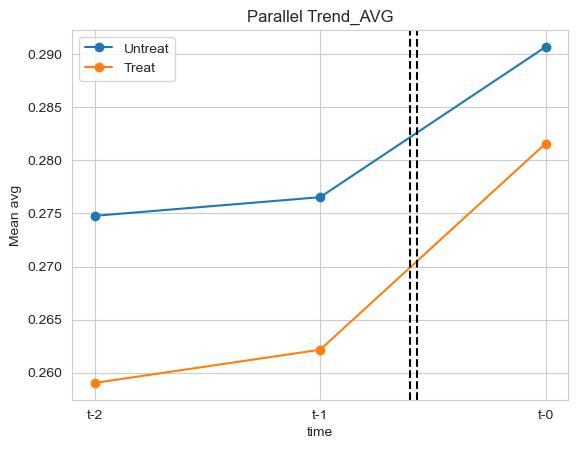

In [88]:
# 2014년까지 OBP의 평균 계산
avg_means_2014 = calculate_mean('AVG', 2012, 2014)

# 2024년까지 OBP의 평균 계산
avg_means_2024 = calculate_mean('AVG', 2022, 2024)

# 그래프 그리기
years_2014 = range(len(avg_means_2014))
years_2024 = range(len(avg_means_2024))

plt.plot(years_2014, avg_means_2014, marker='o', linestyle='-', label='Untreat')
plt.plot(years_2024, avg_means_2024, marker='o', linestyle='-', label='Treat')
plt.title('Parallel Trend_AVG')
plt.xlabel('time')
plt.ylabel('Mean avg')
plt.xticks(range(len(years_2014)), [f"t-{len(years_2014)-i-1}" for i in range(len(years_2014))])  # t+1, t, t-1, t-2 형식으로 표시
plt.grid(True)
plt.legend()

# t-0, t-1 사이에 세로선 그리기
plt.axvline(x=len(years_2014)-1.6, color='black', linestyle='--')
plt.axvline(x=len(years_2014)-1.57, color='black', linestyle='--')

plt.show()

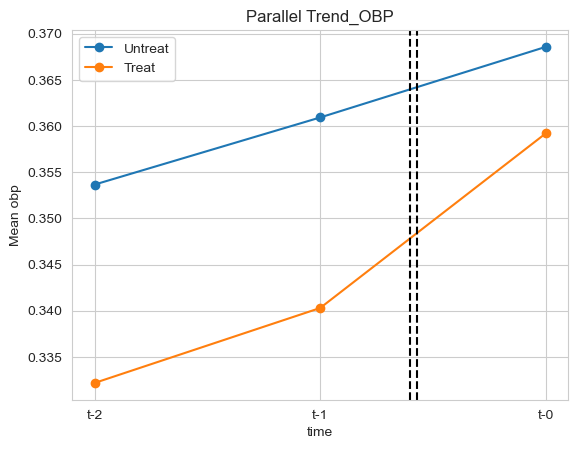

In [89]:
# 2014년까지 OBP의 평균 계산
obp_means_2014 = calculate_mean('OBP', 2012, 2014)

# 2024년까지 OBP의 평균 계산
obp_means_2024 = calculate_mean('OBP', 2022, 2024)

# 그래프 그리기
years_2014 = range(len(obp_means_2014))
years_2024 = range(len(obp_means_2024))

plt.plot(years_2014, obp_means_2014, marker='o', linestyle='-', label='Untreat')
plt.plot(years_2024, obp_means_2024, marker='o', linestyle='-', label='Treat')
plt.title('Parallel Trend_OBP')
plt.xlabel('time')
plt.ylabel('Mean obp')
plt.xticks(range(len(years_2014)), [f"t-{len(years_2014)-i-1}" for i in range(len(years_2014))])  # t+1, t, t-1, t-2 형식으로 표시
plt.grid(True)
plt.legend()

# t-0, t-1 사이에 세로선 그리기
plt.axvline(x=len(years_2014)-1.6, color='black', linestyle='--')
plt.axvline(x=len(years_2014)-1.57, color='black', linestyle='--')

plt.show()

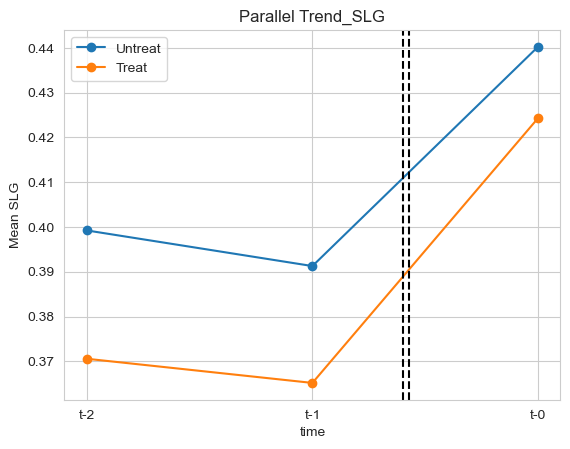

In [84]:
# 2014년까지 OBP의 평균 계산
slg_means_2014 = calculate_mean('SLG', 2012, 2014)

# 2024년까지 OBP의 평균 계산
slg_means_2024 = calculate_mean('SLG', 2022, 2024)

# 그래프 그리기
years_2014 = range(len(slg_means_2014))
years_2024 = range(len(slg_means_2024))

plt.plot(years_2014, slg_means_2014, marker='o', linestyle='-', label='Untreat')
plt.plot(years_2024, slg_means_2024, marker='o', linestyle='-', label='Treat')
plt.title('Parallel Trend_SLG')
plt.xlabel('time')
plt.ylabel('Mean SLG')
plt.xticks(range(len(years_2014)), [f"t-{len(years_2014)-i-1}" for i in range(len(years_2014))])  # t+1, t, t-1, t-2 형식으로 표시
plt.grid(True)
plt.legend()

# t-0, t-1 사이에 세로선 그리기
plt.axvline(x=len(years_2014)-1.6, color='black', linestyle='--')
plt.axvline(x=len(years_2014)-1.57, color='black', linestyle='--')

plt.show()

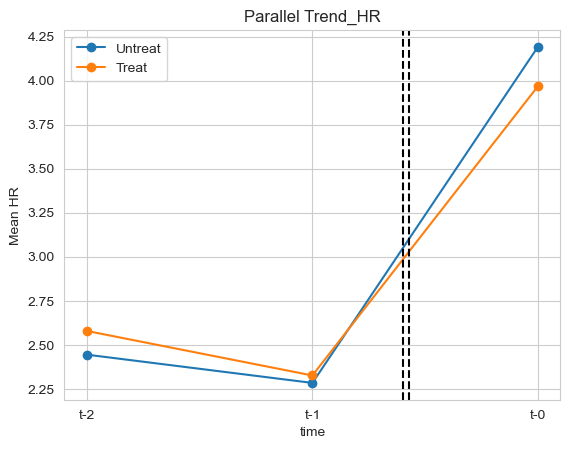

In [85]:
# 2014년까지 OBP의 평균 계산
HR_means_2014 = calculate_mean('HR', 2012, 2014)

# 2024년까지 OBP의 평균 계산
HR_means_2024 = calculate_mean('HR', 2022, 2024)

# 그래프 그리기
years_2014 = range(len(HR_means_2014))
years_2024 = range(len(HR_means_2024))

plt.plot(years_2014, HR_means_2014, marker='o', linestyle='-', label='Untreat')
plt.plot(years_2024, HR_means_2024, marker='o', linestyle='-', label='Treat')
plt.title('Parallel Trend_HR')
plt.xlabel('time')
plt.ylabel('Mean HR')
plt.xticks(range(len(years_2014)), [f"t-{len(years_2014)-i-1}" for i in range(len(years_2014))])  # t+1, t, t-1, t-2 형식으로 표시
plt.grid(True)
plt.legend()

# t-0, t-1 사이에 세로선 그리기
plt.axvline(x=len(years_2014)-1.6, color='black', linestyle='--')
plt.axvline(x=len(years_2014)-1.57, color='black', linestyle='--')

plt.show()

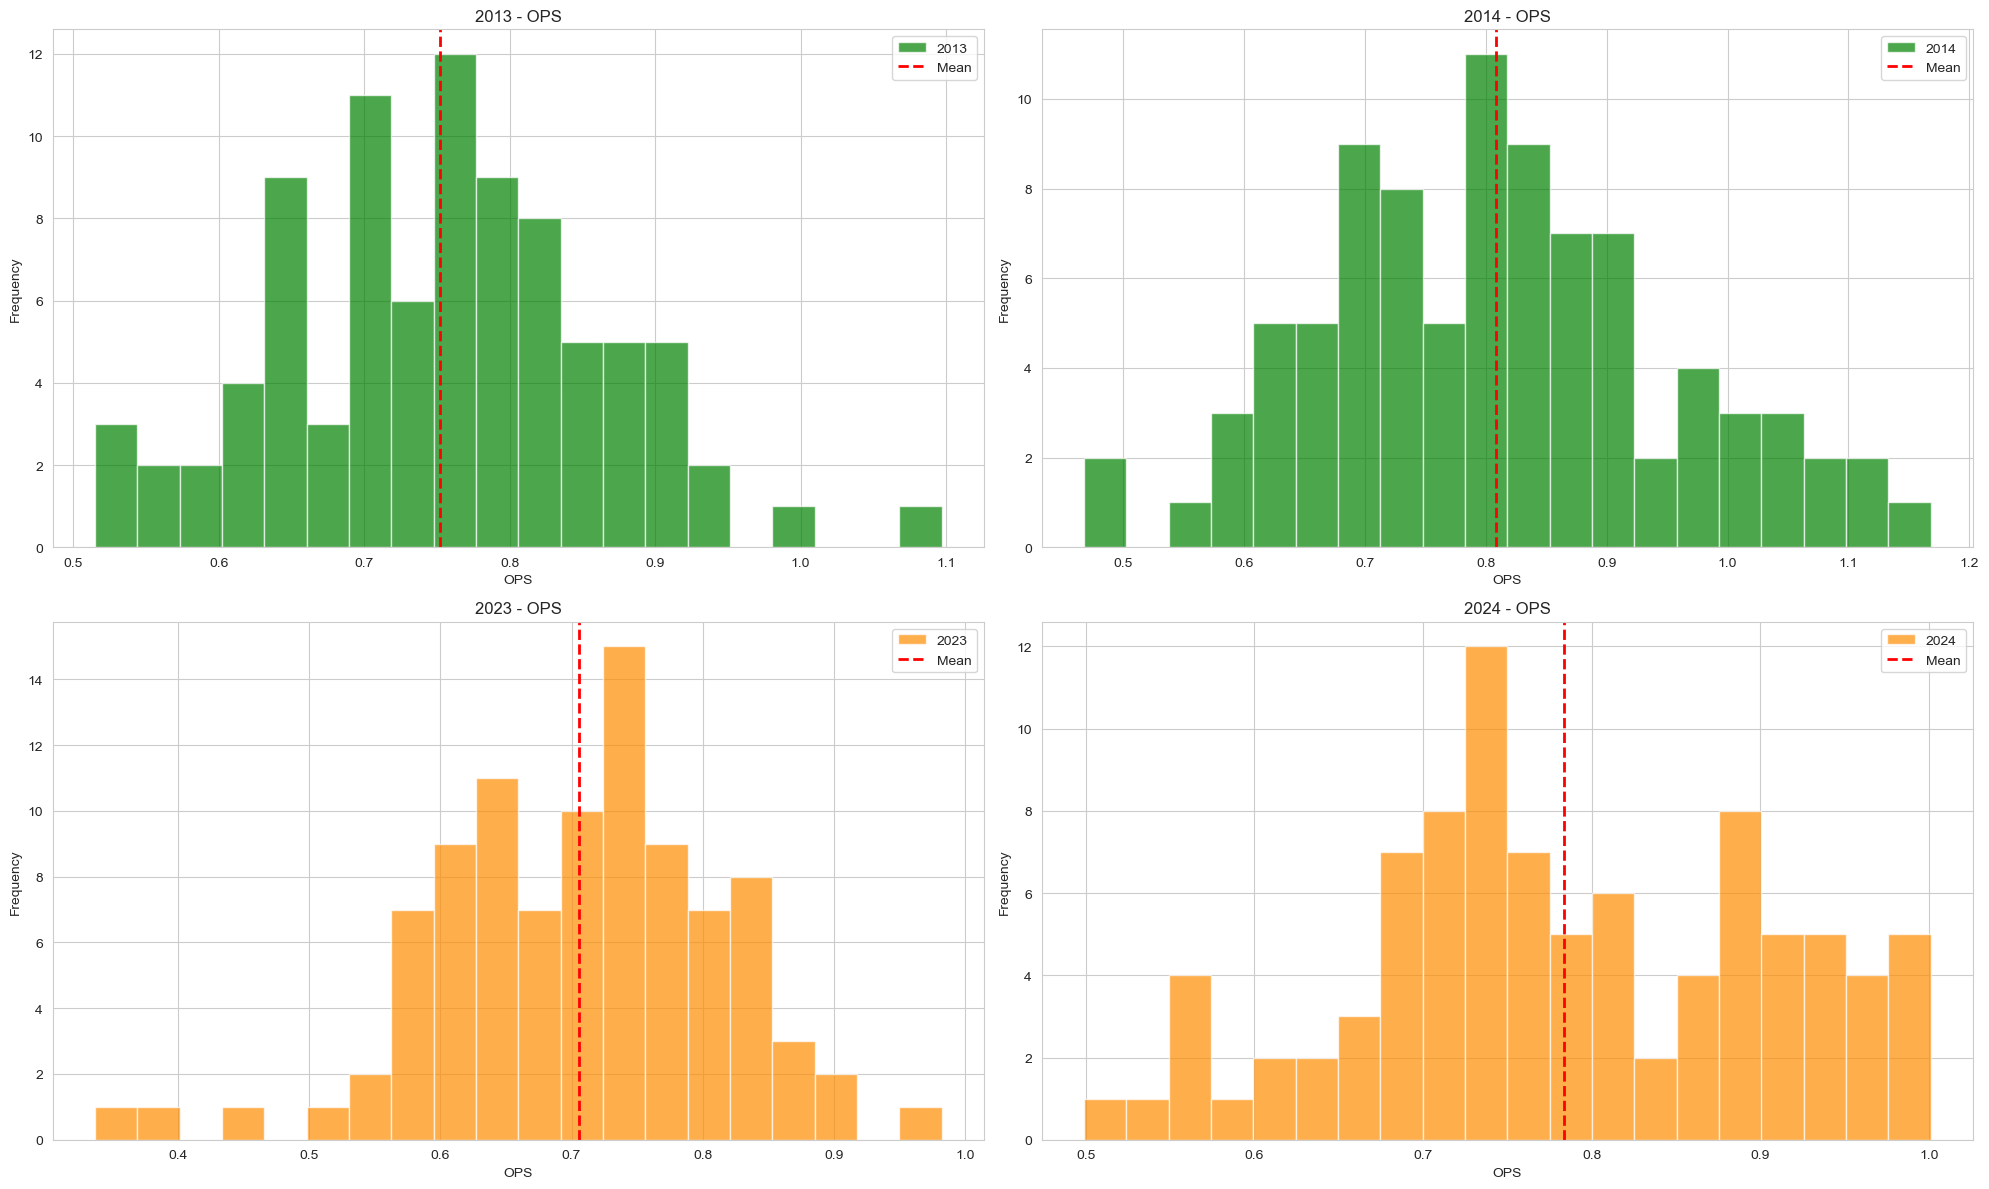

2013 OPS 평균: 0.7522045454545453
2014 OPS 평균: 0.8087752808988763
차이: 0.056570735444331

2023 OPS 평균: 0.7054736842105263
2024 OPS 평균: 0.783445652173913
차이: 0.07797196796338679

이중차분: 0.02140123251905579


In [6]:
plot_compare(hitter_2013, hitter_2014, 2013, 'OPS')

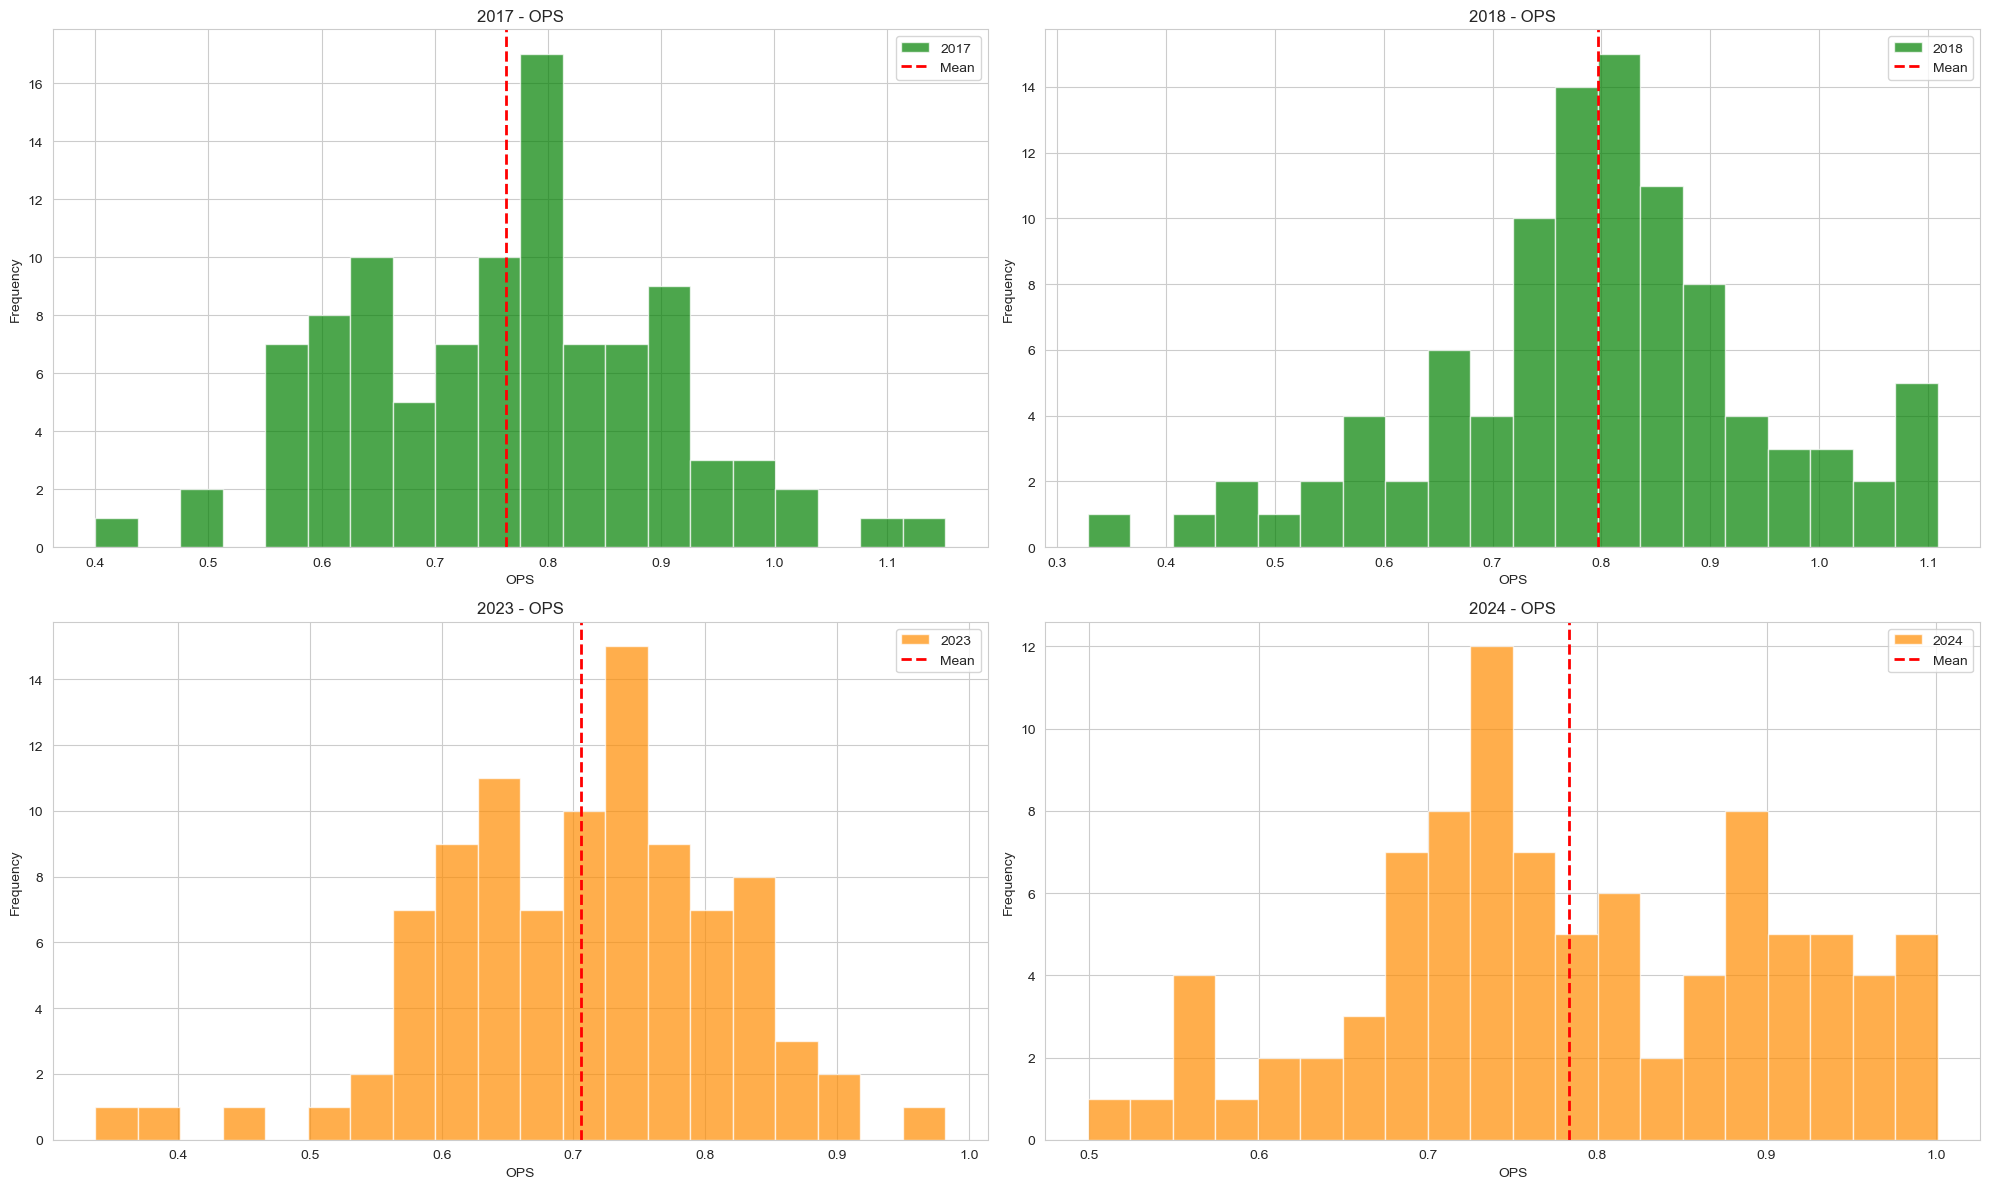

2017 OPS 평균: 0.76329
2018 OPS 평균: 0.7965204081632654
차이: 0.03323040816326539

2023 OPS 평균: 0.7054736842105263
2024 OPS 평균: 0.783445652173913
차이: 0.07797196796338679

이중차분: 0.0447415598001214


In [7]:
plot_compare(hitter_2017, hitter_2018, 2017, 'OPS')

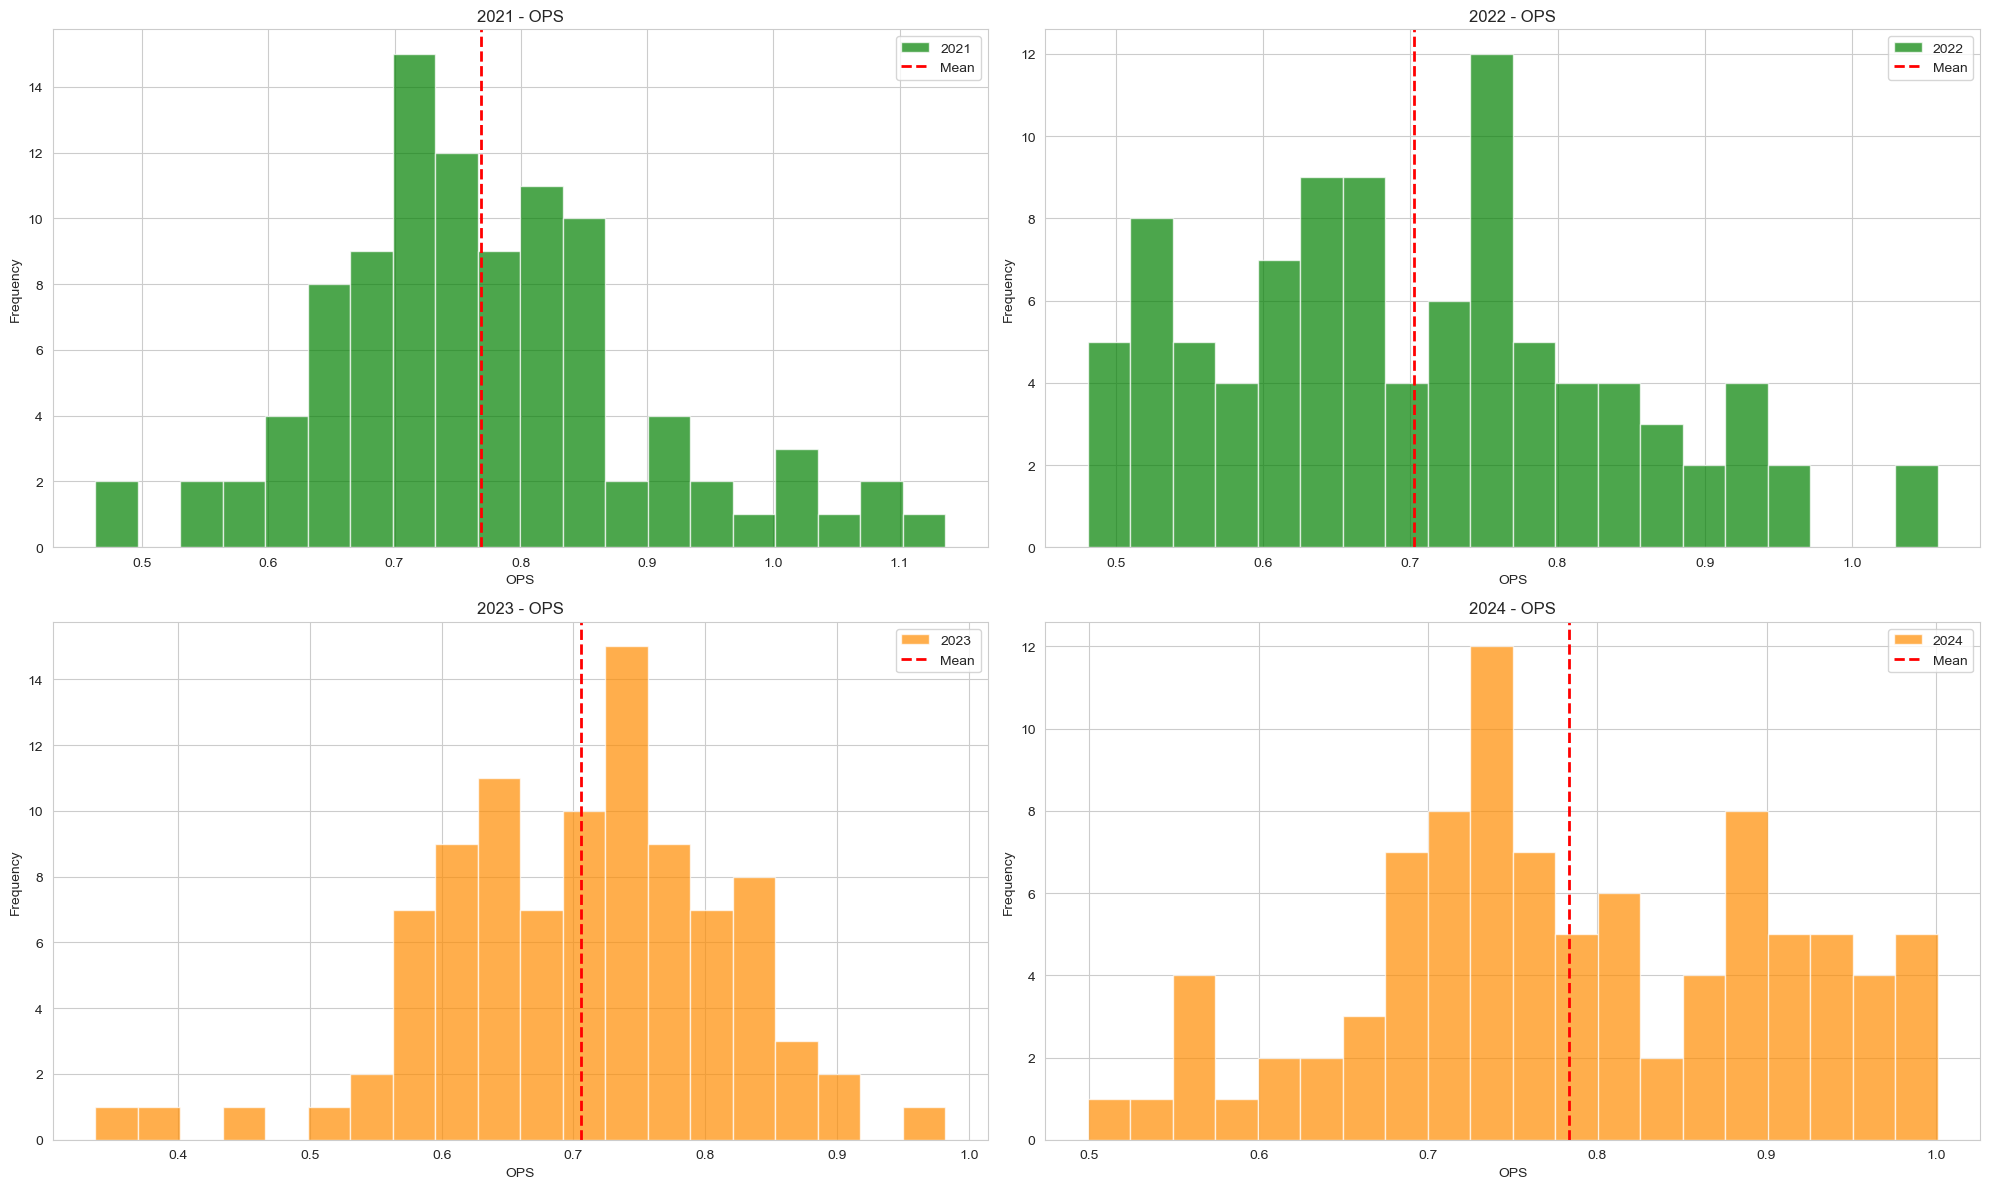

2021 OPS 평균: 0.7685299999999999
2022 OPS 평균: 0.7027473684210526
차이: -0.06578263157894737

2023 OPS 평균: 0.7054736842105263
2024 OPS 평균: 0.783445652173913
차이: 0.07797196796338679

이중차분: 0.14375459954233416


In [8]:
plot_compare(hitter_2021, hitter_2022, 2021, 'OPS')

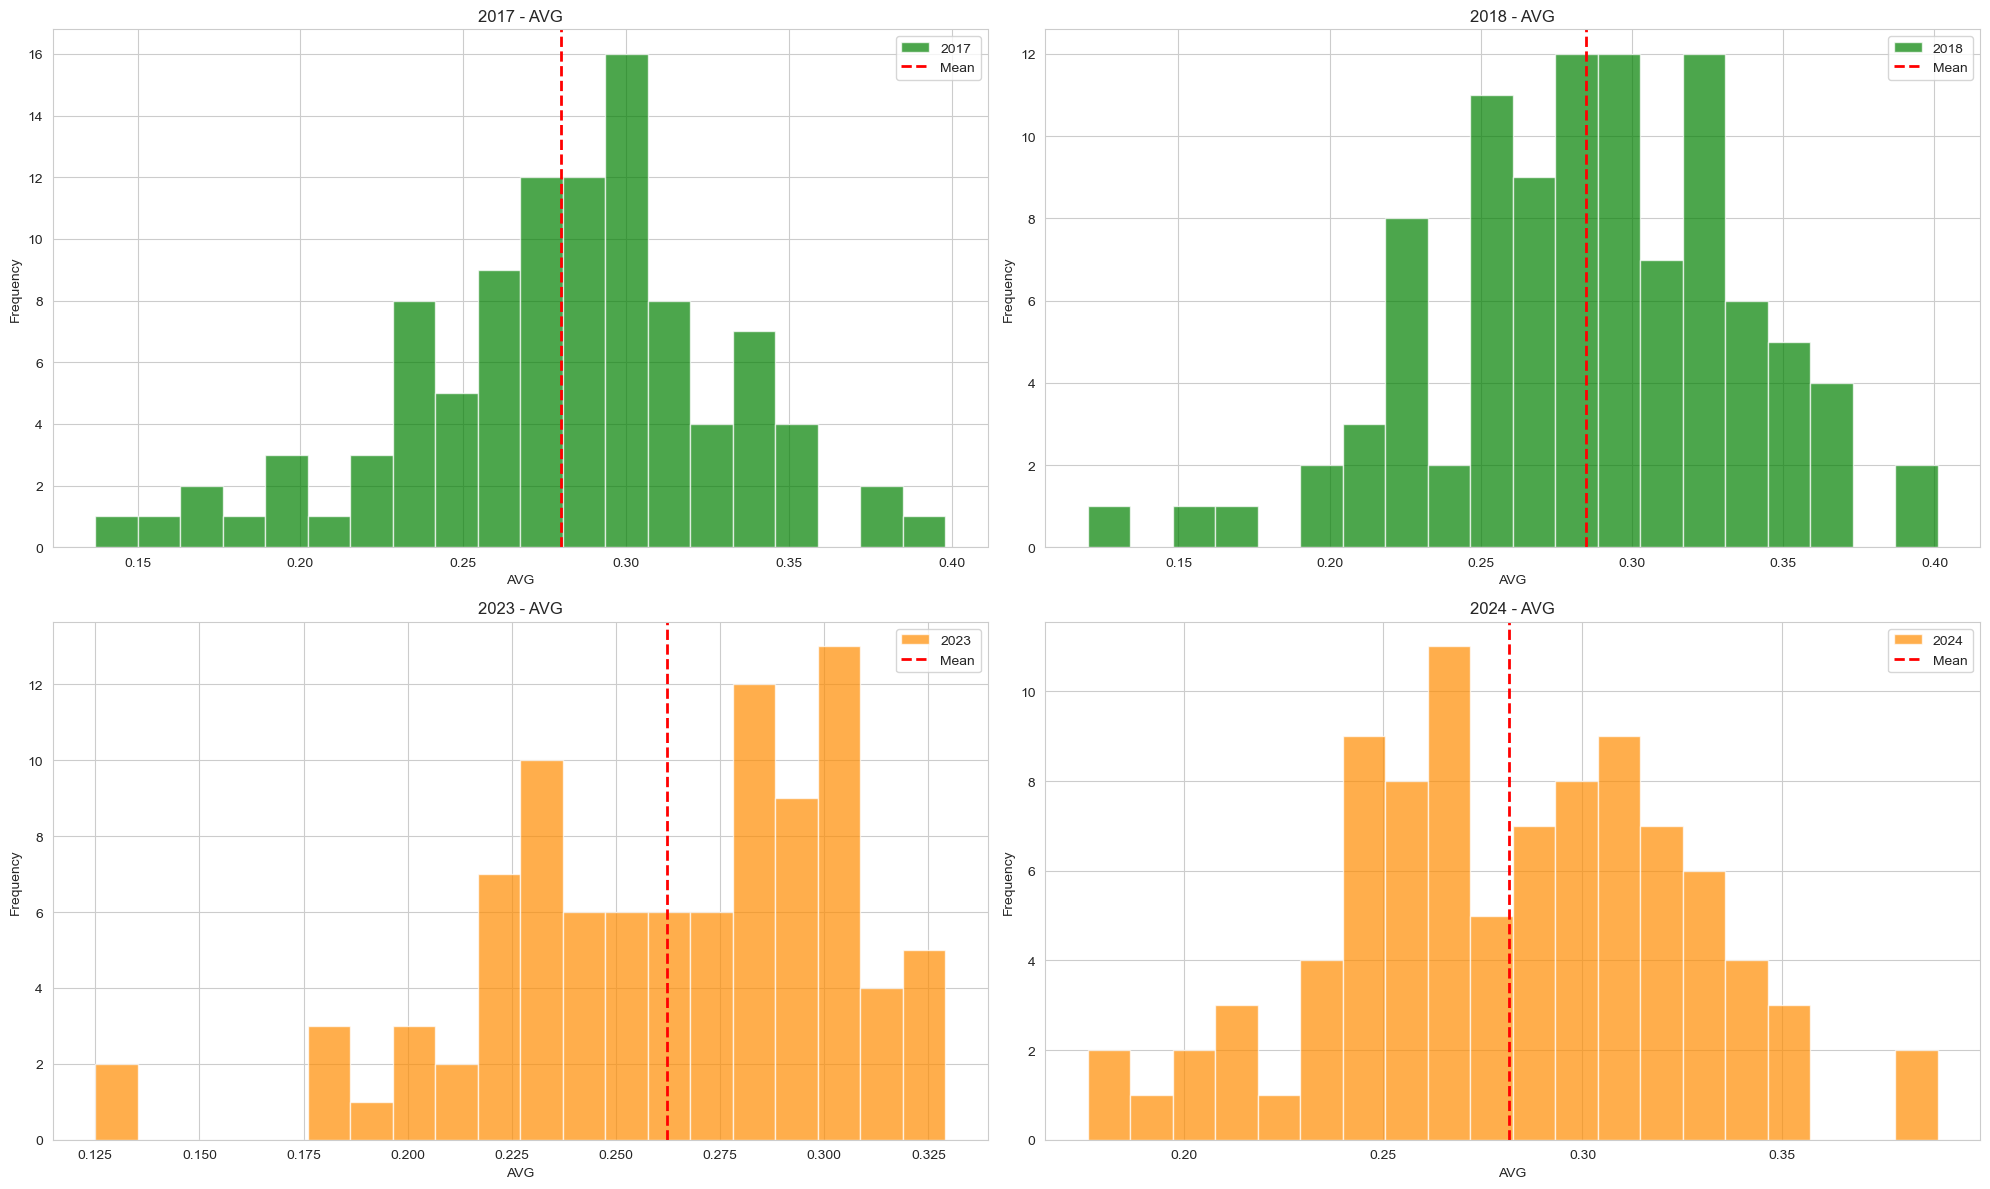

2017 AVG 평균: 0.28008999999999995
2018 AVG 평균: 0.28477551020408165
차이: 0.0046855102040817

2023 AVG 평균: 0.26216842105263155
2024 AVG 평균: 0.2815869565217391
차이: 0.019418535469107545

이중차분: 0.014733025265025845


In [48]:
plot_compare(hitter_2017, hitter_2018, 2017, 'AVG')

In [64]:
a = hitter_2024['HR'].sum()
b = hitter_2023['HR'].sum()
print(a)
print(b)
a - b

365.0
221.0


144.0

In [63]:
a = hitter_2014['HR'].sum()
b = hitter_2013['HR'].sum()
print(a)
print(b)
a-b

373.0
201.0


172.0

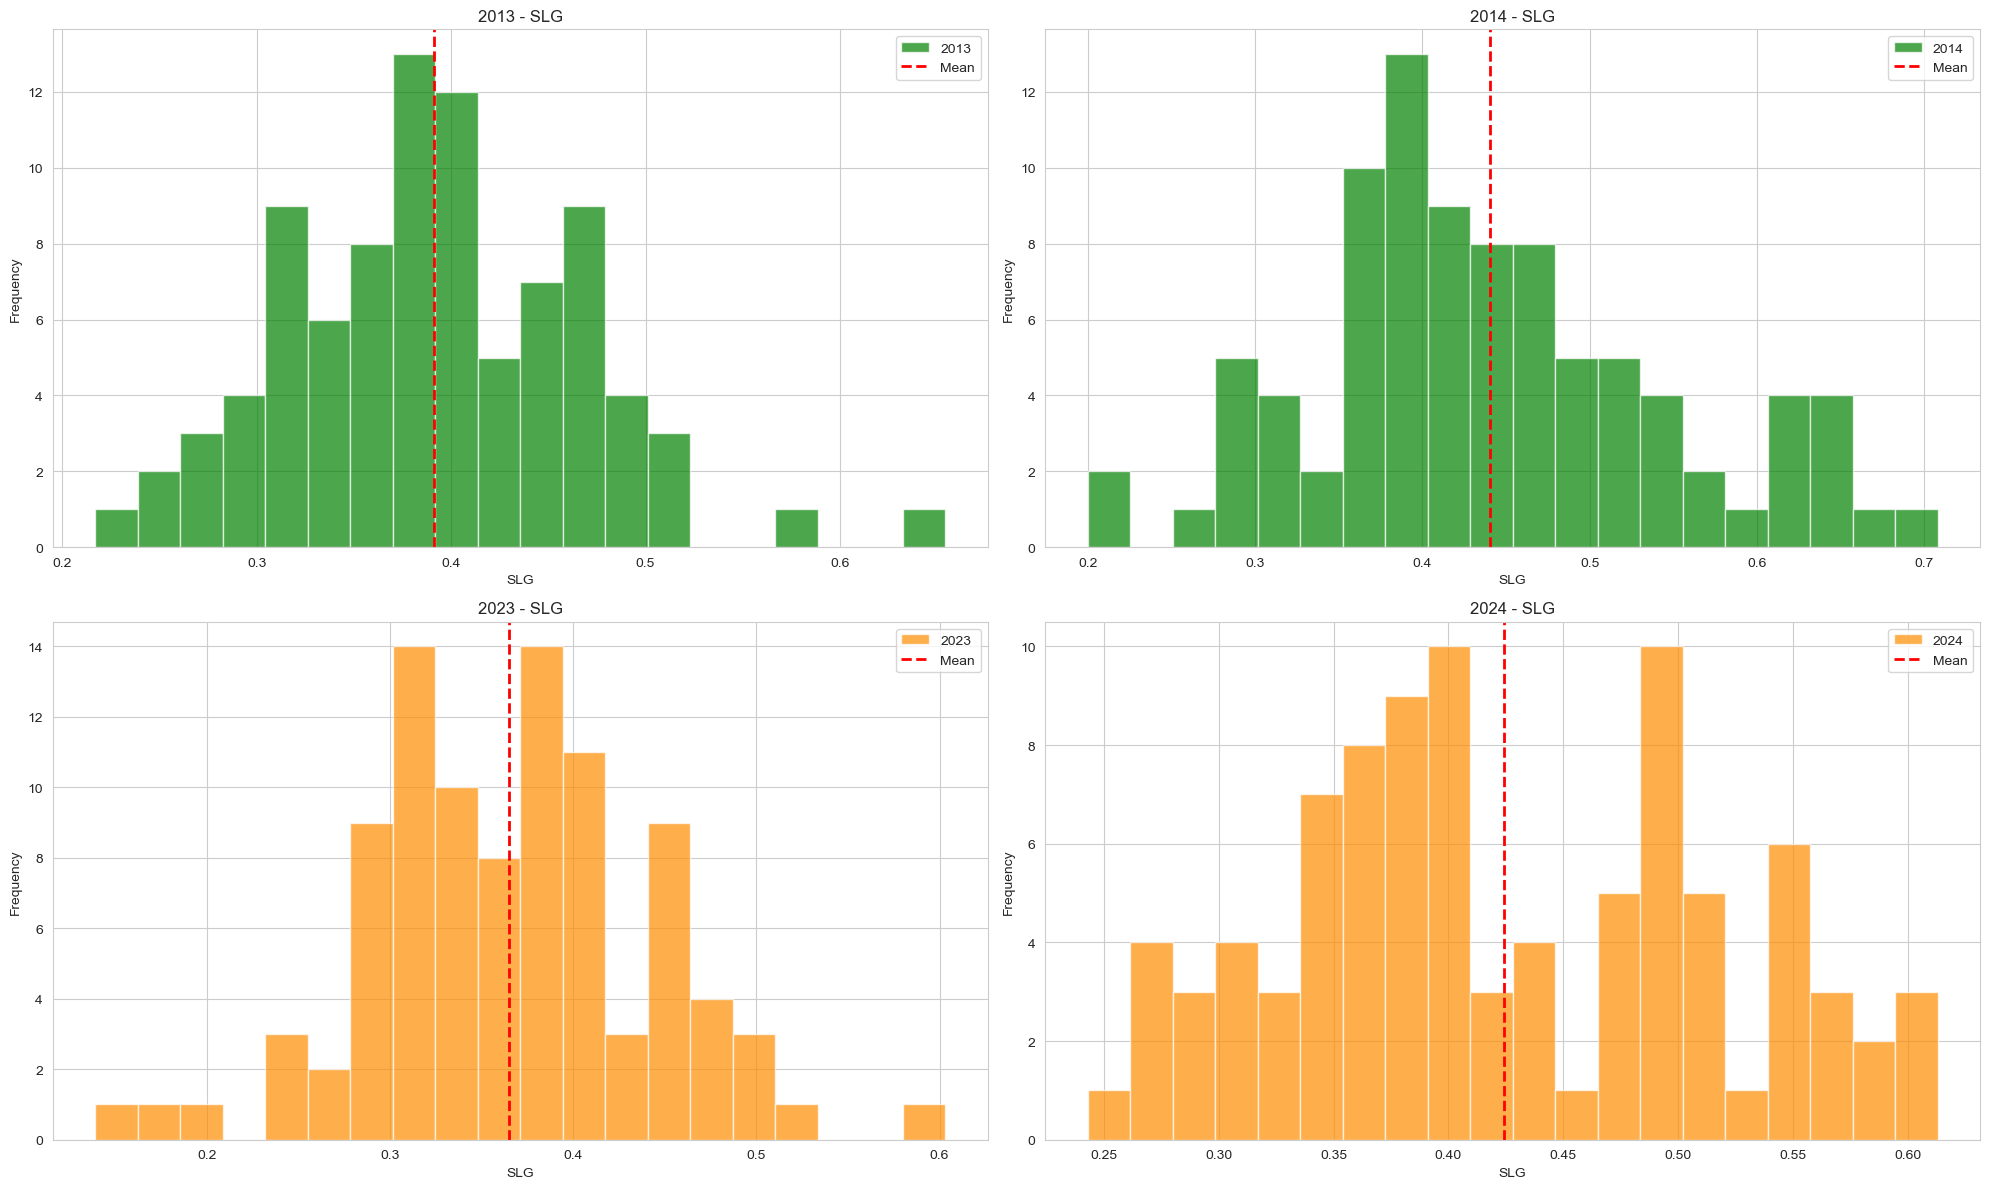

2013 SLG 평균: 0.39127272727272727
2014 SLG 평균: 0.4402022471910113
차이: 0.04892951991828404

2023 SLG 평균: 0.365178947368421
2024 SLG 평균: 0.42425000000000007
차이: 0.05907105263157908

이중차분: 0.010141532713295043


In [59]:
plot_compare(hitter_2013, hitter_2014, 2013, 'SLG')

In [107]:
print('2024 타자 기초통계량')
hitter_2024[['G', 'PA', 'OBP', 'AVG', 'SLG', 'SO', 'BB']].describe()

2024 타자 기초통계량


,G,PA,OBP,AVG,SLG,SO,BB
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,38.510870,149.380435,0.359196,0.281587,0.424250,26.304348,14.173913
std,5.876933,38.285751,0.044269,0.043608,0.091934,11.989683,6.420449
min,21.000000,81.000000,0.256000,0.176000,0.243000,7.000000,3.000000
25%,36.000000,117.750000,0.331750,0.252000,0.358750,16.750000,10.000000
50%,41.000000,155.000000,0.363000,0.281500,0.403500,26.000000,14.000000
75%,43.000000,181.000000,0.385500,0.311000,0.497000,33.250000,18.000000
max,46.000000,205.000000,0.459000,0.389000,0.613000,60.000000,32.000000


In [108]:
print('2023 타자 기초통계량')
hitter_2023[['G', 'PA', 'OBP', 'AVG', 'SLG', 'SO', 'BB']].describe()

2023 타자 기초통계량


,G,PA,OBP,AVG,SLG,SO,BB
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,38.242105,144.568421,0.340295,0.262168,0.365179,25.389474,13.926316
std,5.646908,35.872307,0.045138,0.042804,0.077697,8.933912,6.426743
min,20.000000,80.000000,0.174000,0.125000,0.139000,4.000000,2.000000
25%,35.000000,113.000000,0.323000,0.233500,0.316000,19.000000,10.000000
50%,40.000000,151.000000,0.347000,0.271000,0.367000,26.000000,13.000000
75%,43.000000,175.000000,0.367000,0.295000,0.410000,31.000000,18.000000
max,46.000000,216.000000,0.447000,0.329000,0.603000,51.000000,29.000000


In [109]:
print('2014 타자 기초통계량')
hitter_2014[['G', 'PA', 'OBP', 'AVG', 'SLG', 'SO', 'BB']].describe()

2014 타자 기초통계량


,G,PA,OBP,AVG,SLG,SO,BB
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,42.471910,163.505618,0.368573,0.290685,0.440202,24.348315,16.707865
std,5.873844,40.443036,0.050544,0.046861,0.105335,10.327700,7.817815
min,22.000000,86.000000,0.263000,0.176000,0.200000,7.000000,3.000000
25%,39.000000,129.000000,0.327000,0.260000,0.368000,16.000000,11.000000
50%,44.000000,171.000000,0.361000,0.292000,0.422000,23.000000,16.000000
75%,47.000000,197.000000,0.414000,0.318000,0.500000,30.000000,22.000000
max,49.000000,224.000000,0.473000,0.429000,0.708000,51.000000,42.000000


In [110]:
print('2013 타자 기초통계량')
hitter_2013[['G', 'PA', 'OBP', 'AVG', 'SLG', 'SO', 'BB']].describe()

2013 타자 기초통계량


,G,PA,OBP,AVG,SLG,SO,BB
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,38.602273,145.488636,0.360932,0.276534,0.391273,24.602273,15.318182
std,6.086616,35.919128,0.045439,0.041597,0.075725,9.393737,6.988571
min,21.000000,81.000000,0.267000,0.175000,0.217000,7.000000,4.000000
25%,35.000000,113.250000,0.330000,0.248750,0.338250,17.000000,9.000000
50%,41.000000,150.500000,0.357500,0.276500,0.385000,24.000000,15.000000
75%,43.000000,177.250000,0.396250,0.308000,0.445250,30.000000,21.000000
max,46.000000,212.000000,0.472000,0.380000,0.654000,51.000000,41.000000


In [111]:
# 이중차분 확인
diff1 = check_diff(hitter_2013, hitter_2014, hitter_2023, hitter_2024)
print(diff1)

    AVG_DID  OBP_DID   SLG_DID    SO_DID    BB_DID
0  0.005267  0.01126  0.010142  1.168832 -1.142086
